In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simfang.ttf", size=10)

In [2]:
def runplt():
    plt.figure()
    plt.title('匹萨价格与直径数据',fontproperties=font)
    plt.xlabel('直径（英寸）',fontproperties=font)
    plt.ylabel('价格（美元）',fontproperties=font)
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

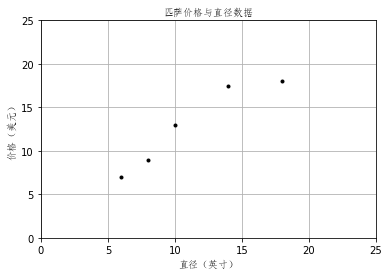

In [3]:
plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression  # 导入线性回归库
model = LinearRegression()  # 创建线性回归模型
model.fit(X, y)  # 线性拟合
print('预测一张12英寸匹萨价格：$%.2f' % model.predict([12])[0])

预测一张12英寸匹萨价格：$13.68


D:\python3.4\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [5]:
data = model.predict(12)

In [6]:
data

array([[ 13.68103448]])

In [12]:
print("预测一张12英寸披萨价格：$%.2f"%model.predict([12]))

预测一张12英寸披萨价格：$13.68


D:\python3.4\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


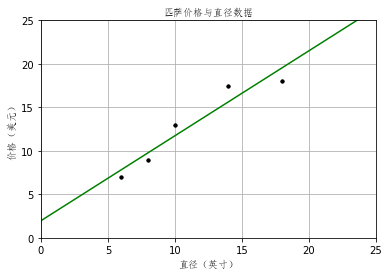

In [15]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')  # . 是点
plt.plot(X2, y2, 'g-')  # -是线
plt.show()

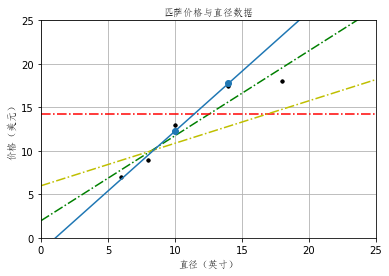

In [16]:
plt = runplt()
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')
plt.show()

[[  1.96551724]
 [ 11.72844828]
 [ 15.63362069]
 [ 26.37284483]]


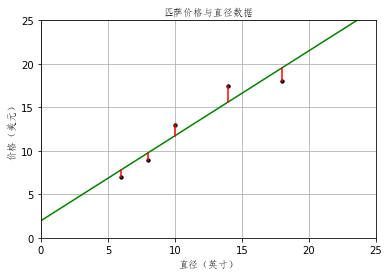

In [19]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
print(y2)
# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')  # 画残差线
plt.show()

In [20]:
import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2))  # 求残差

残差平方和: 1.75


In [21]:
print(np.var([6, 8, 10, 14, 18], ddof=1)) # 方差 ddof参数是贝塞尔(无偏估计)校正系数

23.2


In [22]:
print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])  # 协方差

22.65


In [23]:
np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])

array([[ 23.2 ,  22.65],
       [ 22.65,  24.3 ]])

In [24]:
np.cov([1, 2, 3],[2, 4, 6])

array([[ 1.,  2.],
       [ 2.,  4.]])

In [25]:
np.cov([1, 2, 3], [1, 2, 3])

array([[ 1.,  1.],
       [ 1.,  1.]])

In [26]:
np.cov([1, 3, 4, 6], [1.1, 3.1, 4.2, 6.5])

array([[ 4.33333333,  4.68333333],
       [ 4.68333333,  5.06916667]])

In [27]:
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
model.score(X_test, y_test)  # R方

0.6620052929422553

In [28]:
# y =xP 的解释 p =(xTx)-1(xT)Y
from numpy.linalg import inv  
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [29]:
from numpy.linalg import lstsq
print(lstsq(X, y)[0])  # lstsq 最小二乘解

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [32]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


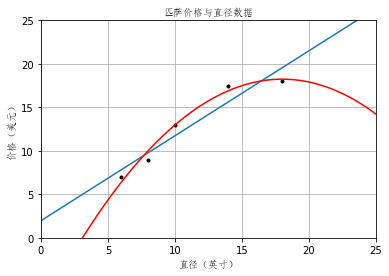

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
一元线性回归 r-squared 0.809726797708
二次回归 r-squared 0.867544365635


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt = runplt()
plt.plot(X_train, y_train, 'k.')
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('一元线性回归 r-squared', regressor.score(X_test, y_test))
print('二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

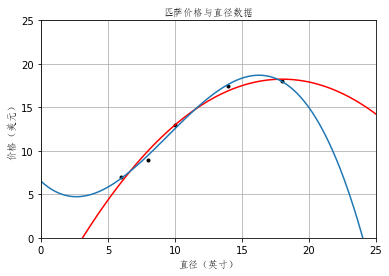

[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
 [  1.00000000e+00   1.40000000e+01   1.96000000e+02   2.74400000e+03]
 [  1.00000000e+00   1.80000000e+01   3.24000000e+02   5.83200000e+03]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.10000000e+01   1.21000000e+02   1.33100000e+03]
 [  1.00000000e+00   1.60000000e+01   2.56000000e+02   4.09600000e+03]]
二次回归 r-squared 0.867544365635
三次回归 r-squared 0.835692415604


In [35]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic))
plt.show()
print(X_train_cubic)
print(X_test_cubic)
print('二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('三次回归 r-squared', regressor_cubic.score(X_test_cubic, y_test))

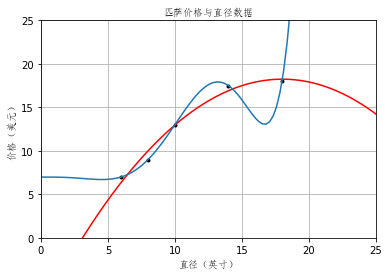

二次回归 r-squared 0.867544365635
七次回归 r-squared 0.491984605687


In [37]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')
quadratic_featurizer = PolynomialFeatures(degree=2)  # 拟合次数
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
seventh_featurizer = PolynomialFeatures(degree=7)   # 拟合次数
X_train_seventh = seventh_featurizer.fit_transform(X_train)
X_test_seventh = seventh_featurizer.transform(X_test)
regressor_seventh = LinearRegression()
regressor_seventh.fit(X_train_seventh, y_train)
xx_seventh = seventh_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_seventh.predict(xx_seventh))
plt.show()
print('二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('七次回归 r-squared', regressor_seventh.score(X_test_seventh, y_test))

In [39]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


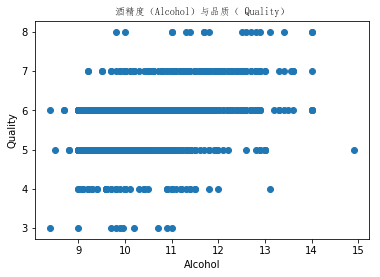

In [41]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('酒精度（Alcohol）与品质（ Quality）',fontproperties=font)
plt.show()

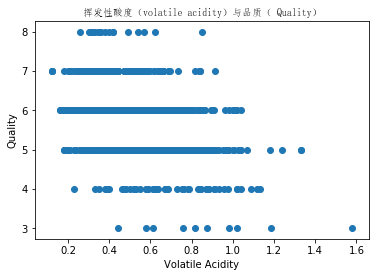

In [43]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('挥发性酸度（volatile acidity）与品质（ Quality）',fontproperties=font)
plt.show()

In [45]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.375026951529


In [47]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.403104882505


In [48]:
from sklearn.cross_validation import cross_val_score
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean(), scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


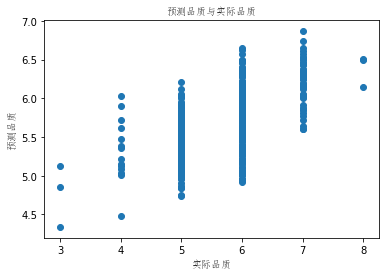

In [49]:
plt.scatter(y_test, y_predictions)
plt.xlabel('实际品质',fontproperties=font)
plt.ylabel('预测品质',fontproperties=font)
plt.title('预测品质与实际品质',fontproperties=font)
plt.show()

In [50]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [51]:
X_scaler = StandardScaler()   # 归一处理
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

D:\python3.4\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\python3.4\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\python3.4\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [70]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('交叉验证R方值:', scores)
print('交叉验证R方均值:', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('测试集R方值:', regressor.score(X_test, y_test))

交叉验证R方值: [ 0.72508924  0.67907383  0.67953239  0.6805125   0.65289649]
交叉验证R方均值: 0.683420886623
测试集R方值: 0.750107607107


D:\python3.4\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [59]:
df = pd.read_csv('pinyin_unicode.csv',sep=',')

In [60]:
data = df[df.columns] # 显示所有的列

In [71]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [{'city': 'New York'},{'city': 'San Francisco'}, {'city': 'Chapel Hill'}]
print(onehot_encoder.fit_transform(instances).toarray())

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game'
] 
vectorizer =CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 1, 'in': 3, 'basketball': 0, 'lost': 4, 'the': 6, 'game': 2}


In [75]:
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer =CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwich': 7}


In [76]:
from sklearn.metrics.pairwise import euclidean_distances
counts = vectorizer.fit_transform(corpus).todense()
for x,y in [[0,1],[0,2],[1,2]]:
    dist = euclidean_distances(counts[x],counts[y])
    print('文档{}与文档{}的距离{}'.format(x,y,dist))

文档0与文档1的距离[[ 2.44948974]]
文档0与文档2的距离[[ 2.64575131]]
文档1与文档2的距离[[ 2.64575131]]


In [77]:
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer =CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwich': 6}


In [78]:
corpus = [
'He ate the sandwiches',
'Every sandwich was eaten by him'
] 
vectorizer =CountVectorizer(binary=True, stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{'ate': 0, 'sandwiches': 3, 'sandwich': 2, 'eaten': 1}


In [79]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
